# Random Walks & Diffusion - a JuPyter story

Diffusion is the random bouncing of a particle, brought on by heat, the vibration of molecules. Suppose we have a single particle to track, and it exists on a line:
![title](img/rw.png)
At each "interval of time" here, it interacts randomly with the molecules in the solution. Increasing the heat makes it jump further, but no more randomly. 

This situation is indentical in form to what mathematicians refer to as a "random walk." A random walk considers a point that jumps rando



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

def random_walk(n_steps=1000, deltaX = 1, deltaY = 1):
    step_list = [(0,0)]
    up_down_vals = [-1*deltaY,deltaY]
    for n in range(1,n_steps):
        step_list.append((deltaX*n, (step_list[n-1][1] + random.choice(up_down_vals))))
    return step_list

# The Beta Distribution & Random Walks

The code seen below performs one function; for n walks, count how many times a random walk is positive, and divide it by the total time of the walk. Then return a list of all fractions resulting from the n runs.

In [3]:
def count_positive(n_walks = 100, n_steps = 1000):
    positive_fractions = []
    # We begin by iterating by the given number of walks
    for walk in range(n_walks):
        positive_counter = 0
        # Make a temporary variable for the walk in question
        current_walk = random_walk(n_steps)
        for value in current_walk:
            if value[1] > 0:
                positive_counter += 1
        positive_fractions.append(positive_counter/n_steps)
    return positive_fractions

(array([ 5.92929293,  2.04040404,  1.52525253,  1.37373737,  1.14141414,
         1.13131313,  0.90909091,  0.87878788,  0.81818182,  0.91919192,
         0.73737374,  0.72727273,  0.71717172,  0.65656566,  0.6969697 ,
         0.63636364,  0.68686869,  0.43434343,  0.85858586,  0.56565657,
         0.67676768,  0.60606061,  0.71717172,  0.56565657,  0.74747475,
         0.71717172,  0.63636364,  0.65656566,  0.73737374,  0.67676768,
         0.61616162,  0.47474747,  0.6969697 ,  0.64646465,  0.56565657,
         0.77777778,  0.75757576,  0.75757576,  0.68686869,  0.66666667,
         0.8989899 ,  0.93939394,  0.94949495,  0.92929293,  0.95959596,
         1.25252525,  1.34343434,  1.47474747,  1.87878788,  3.11111111]),
 array([ 0.    ,  0.0198,  0.0396,  0.0594,  0.0792,  0.099 ,  0.1188,
         0.1386,  0.1584,  0.1782,  0.198 ,  0.2178,  0.2376,  0.2574,
         0.2772,  0.297 ,  0.3168,  0.3366,  0.3564,  0.3762,  0.396 ,
         0.4158,  0.4356,  0.4554,  0.4752,  0.495 ,  0

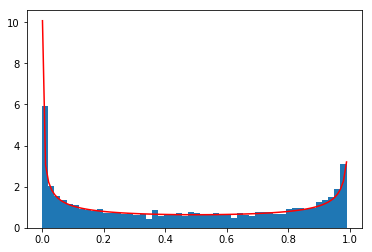

In [26]:
runs = 5000
steps = 100


arcsine_domain = np.linspace(0.001,1,steps, endpoint = False)
arcsine_range = []

def arcsine_distribution(x_val):
    return 1.0/(np.pi*np.sqrt(x_val*(1-x_val)))

for x_val in arcsine_domain:
    arcsine_range.append(arcsine_distribution(x_val))

plt.plot(arcsine_domain, arcsine_range, 'r-')
plt.hist(count_positive(runs, steps),bins=50,normed=True)